<a href="https://colab.research.google.com/github/alvinrach/23-Computer-Vision-Rock-Paper-Scissor/blob/main/23_Computer_Vision_Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Alvin Rachmat**

**Project: Computer Vison - Mendeteksi suit batu, gunting, atau kertas**

**Indosat Ooredoo x Dicoding Machine Learning**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-24 08:46:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.5MB/s    in 37s     

2021-05-24 08:46:53 (8.42 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
dir='/tmp/rockpaperscissors/rps-cv-images'

# Image augmentation

datagen=ImageDataGenerator(
                    rescale=1./255,

                    # Rotate the image in the 40 degree range
                    rotation_range=40,

                    # Flipping the image
                    horizontal_flip=True,
                    vertical_flip=True, 

                    # Shfiting the image
                    width_shift_range=0.2, 
                    height_shift_range=0.2, 

                    # Shear transformation or skewing the image
                    shear_range = 0.2,

                    # Zoom in range 0.8-1.2x
                    zoom_range=0.2,
                    
                    # Brightness in range 90%-100%
                    brightness_range=[0.9,1.0], 

                    # Filling method that is used after doing some augmentation
                    fill_mode = 'nearest',
                    
                    # 40% data as the validation data and the rest are in the training data
                    validation_split=0.4
                    )

train_generator = datagen.flow_from_directory(
        dir,  # Photo directory
        target_size=(100, 150),
        # Input resolution is 200x300 refer to the readme note on the data
        # But scaling down the image is done for faster computation's sake
        # The ratio is choosen a half so it wouldn't give a too bad training performance
        batch_size=1,
        class_mode='categorical', # Three category classification
        subset='training'
        )

# Below is for the data validation
validation_generator = datagen.flow_from_directory(
        dir,
        target_size=(100, 150),
        batch_size=1,
        class_mode='categorical',
        subset='validation'
        )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [5]:
model = tf.keras.models.Sequential(
    [
    tf.keras.Input((100,150,3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'), # The filter is increased bt the multiplication of two, to maximalize the GPU performance in a layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # In general CNN uses just two Fully Connected layer (a hidden layer an an output layer)
    tf.keras.layers.Dense(3, activation='softmax') # Since the output isn't binary, don't use sigmoid. Here I use softmax function
    ]
)

In [6]:
model.compile(loss='categorical_crossentropy',

              optimizer='sgd', # Adam is faster and good enough, SGD slower thatn Adam but it generalizes better
              # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
              
              metrics=['accuracy']
              )

In [7]:
# Callback the epoch after there's no increase in an amount of 'patience'
set_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15) 

history = model.fit(
      train_generator,
      epochs = 70,
      validation_data=validation_generator,
      callbacks=[set_callback],
      verbose = 2
      )

Epoch 1/70
1314/1314 - 61s - loss: 1.0733 - accuracy: 0.3881 - val_loss: 0.8329 - val_accuracy: 0.7666
Epoch 2/70
1314/1314 - 60s - loss: 0.6511 - accuracy: 0.7100 - val_loss: 0.4831 - val_accuracy: 0.8421
Epoch 3/70
1314/1314 - 60s - loss: 0.4871 - accuracy: 0.7861 - val_loss: 0.3642 - val_accuracy: 0.8513
Epoch 4/70
1314/1314 - 65s - loss: 0.3968 - accuracy: 0.8280 - val_loss: 0.2692 - val_accuracy: 0.9027
Epoch 5/70
1314/1314 - 61s - loss: 0.3435 - accuracy: 0.8721 - val_loss: 0.2356 - val_accuracy: 0.9256
Epoch 6/70
1314/1314 - 62s - loss: 0.2722 - accuracy: 0.9056 - val_loss: 0.3279 - val_accuracy: 0.8753
Epoch 7/70
1314/1314 - 62s - loss: 0.1981 - accuracy: 0.9277 - val_loss: 0.1864 - val_accuracy: 0.9439
Epoch 8/70
1314/1314 - 63s - loss: 0.2670 - accuracy: 0.9041 - val_loss: 0.1478 - val_accuracy: 0.9519
Epoch 9/70
1314/1314 - 63s - loss: 0.1717 - accuracy: 0.9467 - val_loss: 0.1936 - val_accuracy: 0.9279
Epoch 10/70
1314/1314 - 63s - loss: 0.1861 - accuracy: 0.9330 - val_loss:

In [8]:
model.evaluate(validation_generator, verbose=2)

874/874 - 12s - loss: 0.0353 - accuracy: 0.9920


[0.035312723368406296, 0.991990864276886]

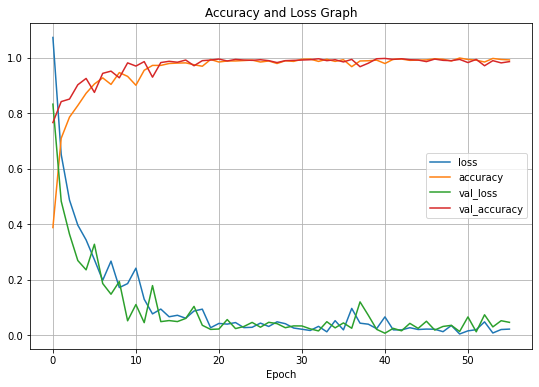

In [9]:
# Plotting the loss and accuracy performance in the every epoch
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(9,6))
plt.xlabel('Epoch')
plt.title('Accuracy and Loss Graph')
plt.grid()

Saving photo_2021-05-20_20-14-26.jpg to photo_2021-05-20_20-14-26.jpg
[[1.0000000e+00 4.3942398e-35 0.0000000e+00]]
photo_2021-05-20_20-14-26.jpg
Paper
Again? [(yes: enter) / (no: ~enter)]


Saving photo_2021-05-20_02-34-47.jpg to photo_2021-05-20_02-34-47.jpg
[[0. 1. 0.]]
photo_2021-05-20_02-34-47.jpg
Rock
Again? [(yes: enter) / (no: ~enter)]


Saving photo_2021-05-20_20-14-26.jpg to photo_2021-05-20_20-14-26 (1).jpg
[[1.0000000e+00 4.3942398e-35 0.0000000e+00]]
photo_2021-05-20_20-14-26.jpg
Paper
Again? [(yes: enter) / (no: ~enter)]


Saving batu 180.png to batu 180.png
[[0. 1. 0.]]
batu 180.png
Rock
Again? [(yes: enter) / (no: ~enter)]l


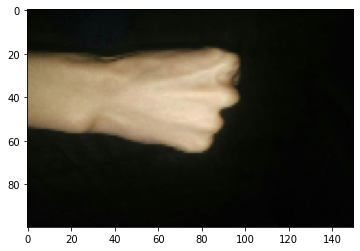

In [11]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

i=''

while(i==''):
  uploaded=files.upload()

  for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    # Since we use categorical_crossentropy in the loss parameter at model.compile,
    # Translate the result with argmax: returns the index which has the max values
    j = np.argmax(classes)
    
    print(classes)
    print(fn)

    if j==0:
      print('Paper')
    elif j==1:
      print('Rock')
    elif j==2:
      print('Scissor')

  i=input('Again? [(yes: enter) / (no: ~enter)]')